In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import sys
sys.path.append('/home/brysongray/donglab/slice_reg/')
import slice_reg
import os
from os.path import join, split
import numpy as np
import tifffile
import pandas as pd
import re

src_dir = '/home/brysongray/data/hongwei_data/SF221013_02A/bk'
target_dir = '/home/brysongray/data/hongwei_data/SF221013_02A/fluoro'
out_dir = '/home/brysongray/donglab/slice_reg_outputs/SF221013_02A_out'

<IPython.core.display.Javascript object>


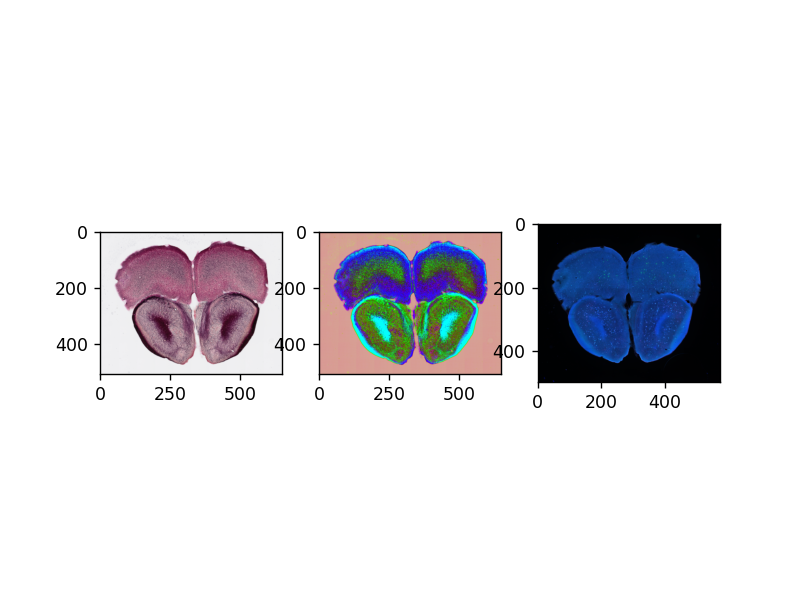

<IPython.core.display.Javascript object>


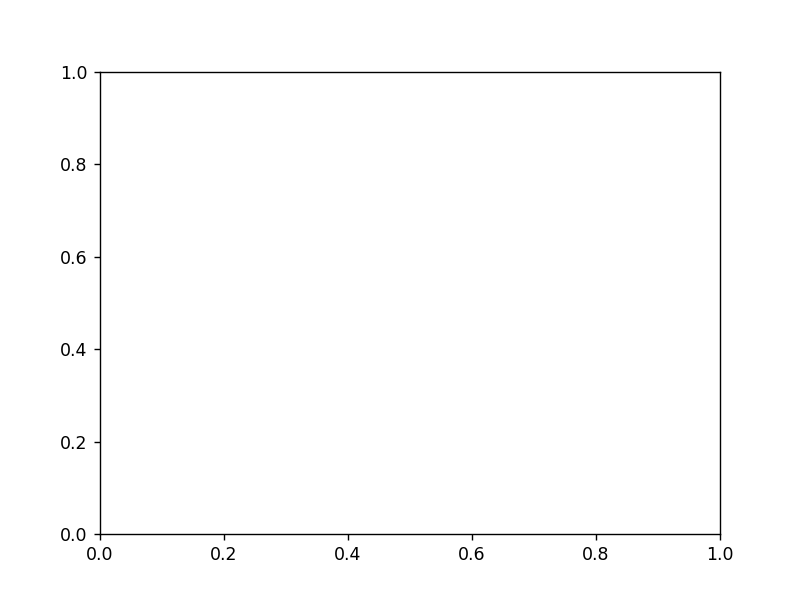

registering image SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_01_down4.tif and SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_down2.tif
I0 shape:  (4072, 5234, 3)
I after downsample:  (507, 652, 183)
J shape:  (3975, 4599, 3)
J after downsample:  (496, 574, 3)


<IPython.core.display.Javascript object>


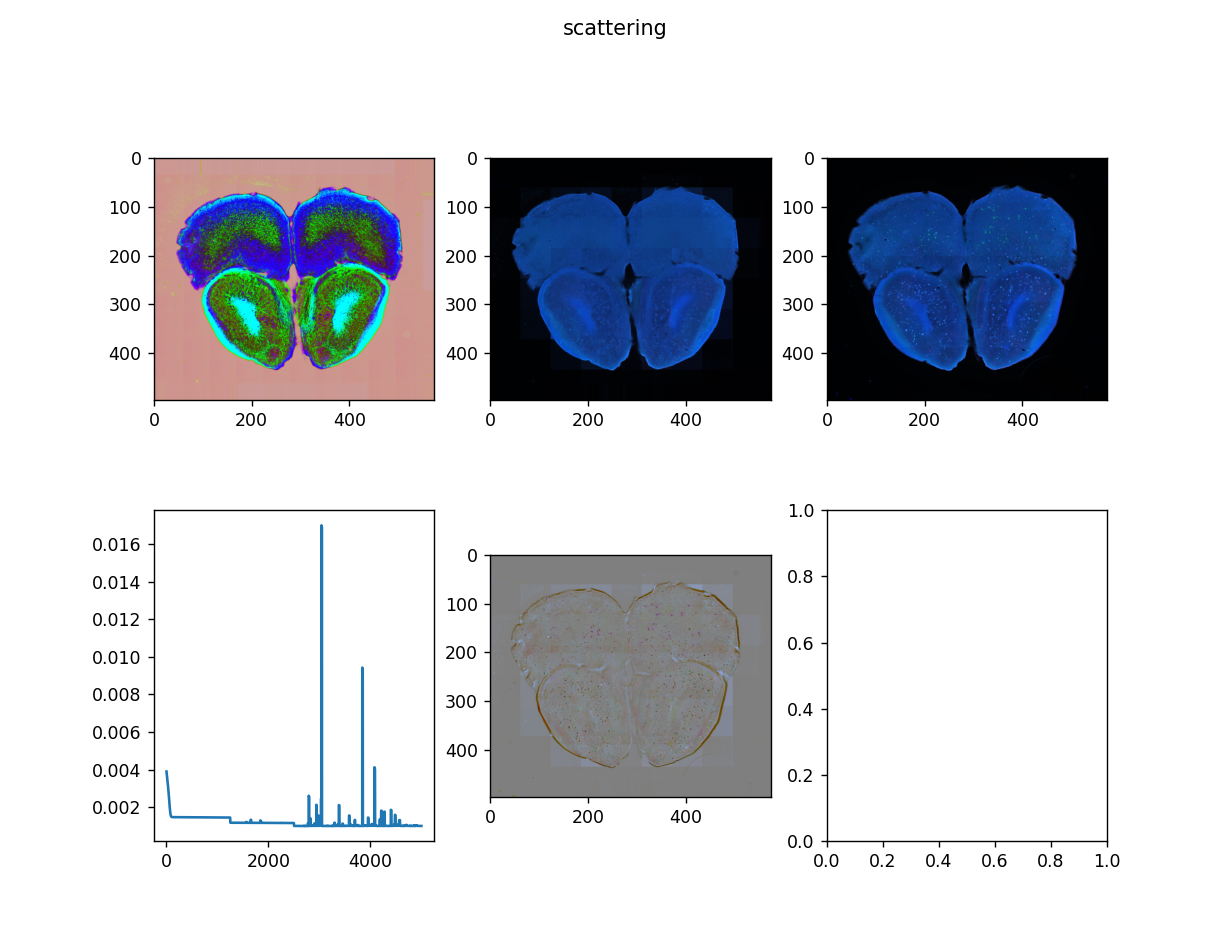

Iteration 157, translation oscilating, reducing epT to 5e-08
Iteration 178, translation oscilating, reducing epT to 2.5e-08
Iteration 186, translation oscilating, reducing epT to 1.25e-08
Iteration 786, translation oscilating, reducing epT to 6.25e-09
Iteration 787, translation oscilating, reducing epT to 3.125e-09
Iteration 821, translation oscilating, reducing epT to 1.5625e-09
Iteration 852, translation oscilating, reducing epT to 7.8125e-10
Iteration 2796, linear oscilating, reducing epL to 2.5e-06
Iteration 2798, linear oscilating, reducing epL to 1.25e-06
Iteration 2799, linear oscilating, reducing epL to 6.25e-07
Iteration 2800, linear oscilating, reducing epL to 3.125e-07
Iteration 2801, linear oscilating, reducing epL to 1.5625e-07
Iteration 2805, linear oscilating, reducing epL to 7.8125e-08
Iteration 2946, linear oscilating, reducing epL to 3.90625e-08
Iteration 2975, linear oscilating, reducing epL to 1.953125e-08
Iteration 2976, linear oscilating, reducing epL to 9.765625e

/home/brysongray/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


time elapsed for image pair: 115.89751863479614
registering image SF221013_02A_BK_JIANDONG_AD_01_02_20x_BF_02_down4.tif and SF221013_02A_JIANDONG_AD_01_02_10x_CY5, GFP, DAPI, GOLD, TRITC_02_down2.tif
I0 shape:  (4422, 5407, 3)


KeyboardInterrupt: 

In [5]:
# slice_reg.register_slices(src_dir, target_dir, out_dir, epL=2e-2, epT=1e-7)
slice_reg.register_slices(src_dir, target_dir, out_dir, epL=5e-6, epT=1e-7, niter=5000)

In [ ]:
# outliers = [10,13,25,27,31,32,41,42]
outliers = [42]
slice_reg.register_slices(src_dir, target_dir, out_dir, ids=outliers, epL=5e-6, epT=1e-7, niter=12000)

## View transformed images

In [3]:
npzlist = os.listdir(out_dir)
npzlist = [f for f in npzlist if 'npz' in f]
npzlist.sort()
filesM = os.listdir(src_dir)
filesM.sort()
filesN = os.listdir(target_dir)
filesN.sort()
print(npzlist[0])
print(filesM[0])
print(filesN[0])

SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_down2_to_SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_01_down4_registration.npz
SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_01_down4.tif
SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_down2.tif


In [ ]:
slice_reg.transform_series(out_dir, src_dir, target_dir, src_files=filesM, target_files=filesN, transform_list=npzlist)

## Apply transforms to original images

In [1]:
# original fluoro example
spreadsheet = '/home/brysongray/bmap/dong/hanpeng-bk-SF221013_02A/SF221013_02A_converted_register list.xlsx'
myelin_dir = '/home/brysongray/bmap/dong/hanpeng-bk-SF221013_02A/SF221013_02A_BK_converted'
fluoro_dir = '/home/brysongray/bmap/dong/hanpeng-bk-SF221013_02A/SF221013_02A_converted'
transforms_dir = '/home/brysongray/donglab/slice_reg_outputs/SF221013_02A_out'
out_dir = '/home/brysongray/bmap/dong/SF221013_02A_output/'

In [5]:
filesN = os.listdir(fluoro_dir)
filesN.sort()
with tifffile.TiffFile(join(fluoro_dir, filesN[0])) as tif:
    dx = tif.pages[0].tags.values()[19].value['pixelsizex']
    dy = tif.pages[0].tags.values()[19].value['pixelsizey']
print(dx*20)
print(dy)

1.3000632626664498e-05
6.500483580657893e-07


In [4]:
# get lists of file names from the excel sheet
fnames_data = pd.read_excel(spreadsheet, usecols=[0,2])
filesM = fnames_data.iloc[:,0] # Myelin
filesN = fnames_data.iloc[:,1] # Fluoro
# remove nan values from the dataframe
filesM = filesM.dropna()
filesN = filesN.dropna()
# remove single space strings from the dataframe
filesM = filesM[filesM != ' ']
filesN = filesN[filesN != ' ']
# replace double backslash with single forward slash
filesM = [f.replace('\\', '/') for f in filesM]
filesN = [f.replace('\\', '/') for f in filesN]
# get only the file names
filesM = [split(f)[1][1:] for f in filesM] # remove the first character which is a space
filesN = [split(f)[1][2:] for f in filesN] # remove the first two characters which are spaces

# compare the file names in the excel sheet to the file names in the directory
listdirN = os.listdir(fluoro_dir)
listdirN = [f for f in listdirN if 'Overview' not in f]
listdirM = os.listdir(myelin_dir)
listdirM = [f for f in listdirM if 'Overview' not in f]
# check that listdirN and filesN contain the same files
filesNintersection = [f for f in filesN if f in listdirN]
print(len(filesNintersection), len(listdirN), len(filesN))
print(len(filesNintersection)==len(listdirN)==len(filesN))
# check that listdirM and filesM contain the same files
filesMintersection = [f for f in filesM if f in listdirM]
print(len(filesMintersection), len(listdirM), len(filesM))
print(len(filesMintersection)==len(listdirM)==len(filesM))

# filesN must be grouped into n for each image with n channels
filesN0 = [filesN[i:i+5] for i in range(0, len(filesN[:74]), 5)]
filesN1 = [filesN[i:i+5-1] for i in range(75, len(filesN), 5-1)]
filesN = filesN0 + filesN1
filesN_ = [f[0] for f in filesN]

# get list of transforms
npzlist = os.listdir(transforms_dir)
npzlist = [f for f in npzlist if 'npz' in f]
npzlist.sort()

219 219 219
True
51 51 51
True


In [5]:
# correct the numbering so the images align when the lists are sorted
filesM = sorted(os.listdir(myelin_dir))
filesM = [f for f in filesM if 'Overview' not in f]
print(filesM[:15])
filesM_v1 = [] 
for f in filesM:
    fsplit = re.split(r'(D_.._)',f)
    if fsplit[2][:3] == '20x':
        f_ = fsplit[0] + fsplit[1] + '01_' + fsplit[2]
        filesM_v1.append(f_)
    else:
        # n = int(f.split('_AD_0*_')[1][:2])
        n = int(fsplit[2][:2])
        f_ = fsplit[0] + fsplit[1] + f'{n+1:02}' + fsplit[2][2:]
        filesM_v1.append(f_)

dictM = dict(zip(filesM_v1, filesM))
filesM_v1.sort()
filesM = [dictM[f] for f in filesM_v1]

['SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_02.tif', 'SF221013_02A_BK_JIANDONG_AD_01_02_20x_BF_03.tif', 'SF221013_02A_BK_JIANDONG_AD_01_03_20x_BF_04.tif', 'SF221013_02A_BK_JIANDONG_AD_01_04_20x_BF_05.tif', 'SF221013_02A_BK_JIANDONG_AD_01_05_20x_BF_06.tif', 'SF221013_02A_BK_JIANDONG_AD_01_06_20x_BF_07.tif', 'SF221013_02A_BK_JIANDONG_AD_01_07_20x_BF_08.tif', 'SF221013_02A_BK_JIANDONG_AD_01_08_20x_BF_09.tif', 'SF221013_02A_BK_JIANDONG_AD_01_09_20x_BF_10.tif', 'SF221013_02A_BK_JIANDONG_AD_01_10_20x_BF_11.tif', 'SF221013_02A_BK_JIANDONG_AD_01_11_20x_BF_12.tif', 'SF221013_02A_BK_JIANDONG_AD_01_12_20x_BF_13.tif', 'SF221013_02A_BK_JIANDONG_AD_01_13_20x_BF_14.tif', 'SF221013_02A_BK_JIANDONG_AD_01_14_20x_BF_15.tif', 'SF221013_02A_BK_JIANDONG_AD_01_20x_BF_01.tif']


In [6]:
print(filesM[0],'\n',
      filesN_[0],'\n',
      npzlist[0])

SF221013_02A_BK_JIANDONG_AD_01_20x_BF_01.tif 
 SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_CH0-CY5.tif 
 SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_down2_to_SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_01_down4_registration.npz


In [9]:
slice_reg.transform_series(out_dir, src_dir=myelin_dir, target_dir=fluoro_dir, transforms_dir=transforms_dir, src_files=filesM, target_files=filesN_, transform_list=npzlist, device='cpu')

loading:  SF221013_02A_BK_JIANDONG_AD_01_20x_BF_01.tif
I shape:  (16287, 20933, 3)
time to apply transform: 5.3994386196136475
torch.Size([3, 7950, 9198])
saved AI to  /home/brysongray/bmap/dong/SF221013_02A_output/SF221013_02A_JIANDONG_AD_01_01_10x_CY5, GFP, DAPI, GOLD, TRITC_01_down2_to_SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_01_down4_AI.tif
loading:  SF221013_02A_BK_JIANDONG_AD_01_01_20x_BF_02.tif
I shape:  (17687, 21628, 3)
time to apply transform: 19.119914531707764
torch.Size([3, 7832, 9731])
saved AI to  /home/brysongray/bmap/dong/SF221013_02A_output/SF221013_02A_JIANDONG_AD_01_02_10x_CY5, GFP, DAPI, GOLD, TRITC_02_down2_to_SF221013_02A_BK_JIANDONG_AD_01_02_20x_BF_02_down4_AI.tif
loading:  SF221013_02A_BK_JIANDONG_AD_01_02_20x_BF_03.tif
I shape:  (18531, 23187, 3)
time to apply transform: 49.50894737243652
torch.Size([3, 8483, 10736])
saved AI to  /home/brysongray/bmap/dong/SF221013_02A_output/SF221013_02A_JIANDONG_AD_01_03_10x_CY5, GFP, DAPI, GOLD, TRITC_03_down2_to_SF221013_0